# Bootes master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
33f5ec7 (Wed Dec 6 16:56:17 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix,
                                              quick_checks)

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "HELP_master_catalogue_Bootes_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: HELP_master_catalogue_Bootes_20171212.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


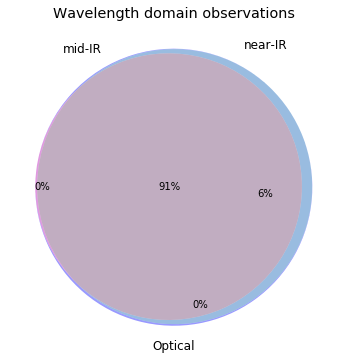

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

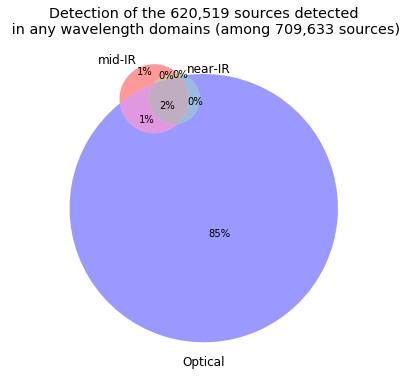

In [7]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = []
g_bands = ["GPC1 g", "BASS g"]
r_bands = ["GPC1 r", "BASS r", "Mosaic r"]
i_bands = ["GPC1 i",           "Mosaic i"]
z_bands = ["GPC1 z", "BASS z",            "90prime z"]
y_bands = ["GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


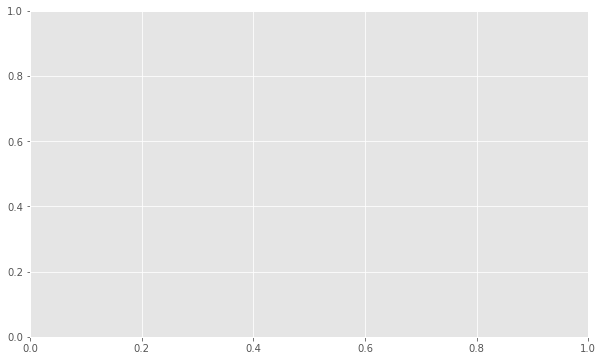

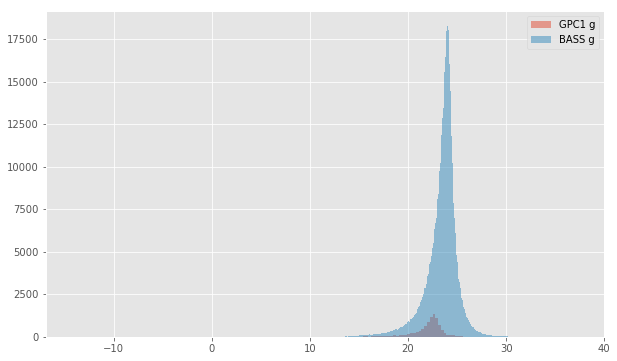

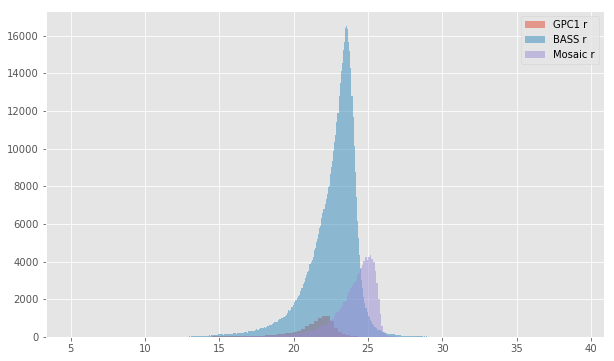

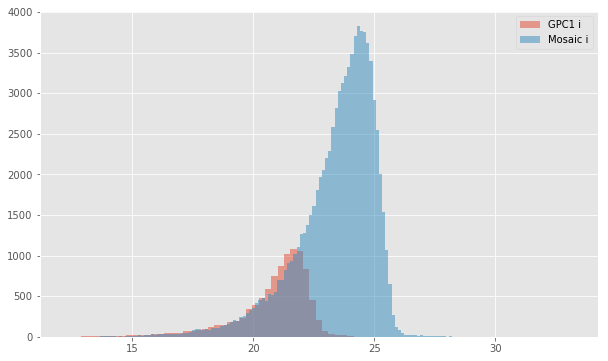

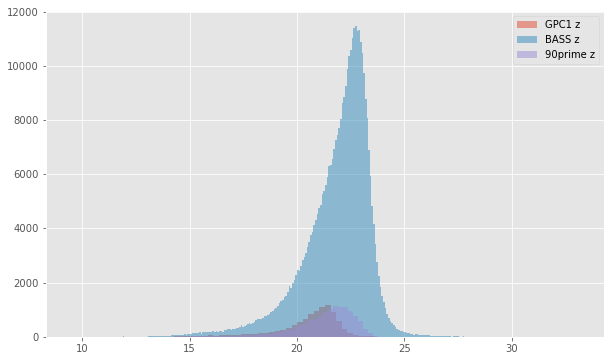

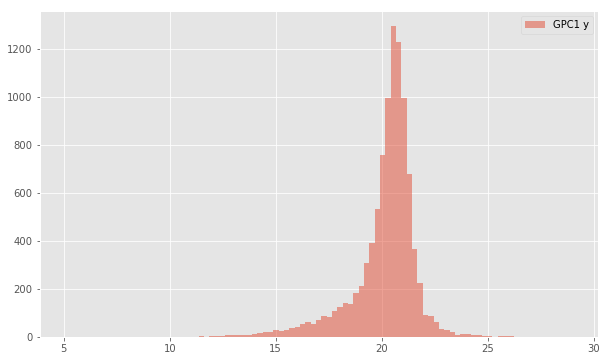

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

BASS g (aperture) - GPC1 g (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.26
- 1% percentile: -2.1393674278259276
- 99% percentile: 3.2789934539795116


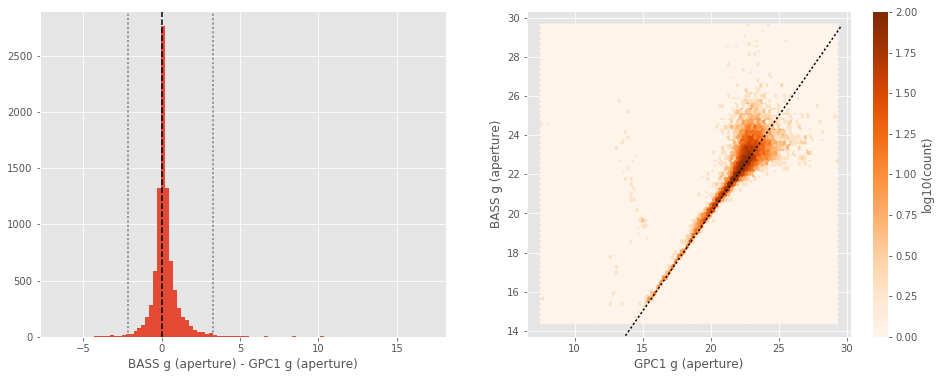

BASS g (total) - GPC1 g (total):
- Median: -0.01
- Median Absolute Deviation: 0.25
- 1% percentile: -1.816142177581787
- 99% percentile: 3.0389384269714412


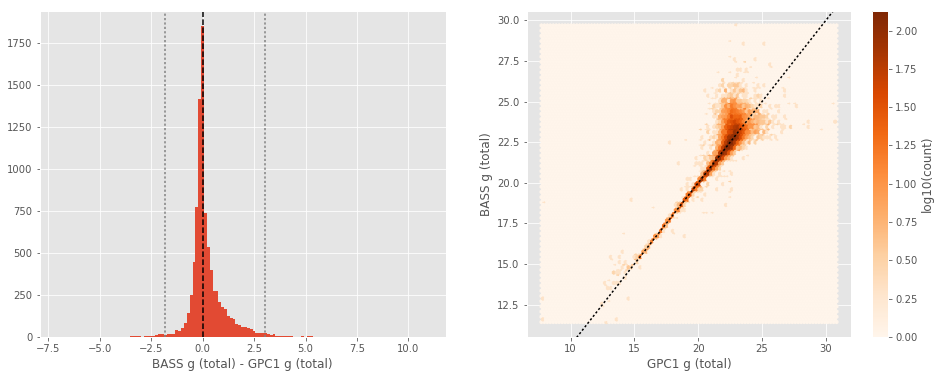

BASS r (aperture) - GPC1 r (aperture):
- Median: -0.07
- Median Absolute Deviation: 0.18
- 1% percentile: -1.9159104919433594
- 99% percentile: 4.464806547164906


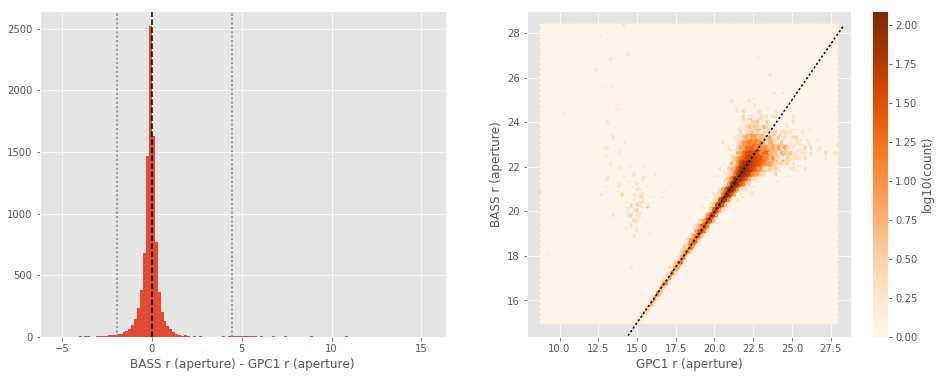

BASS r (total) - GPC1 r (total):
- Median: -0.17
- Median Absolute Deviation: 0.15
- 1% percentile: -1.51219425201416
- 99% percentile: 1.4778061866760288


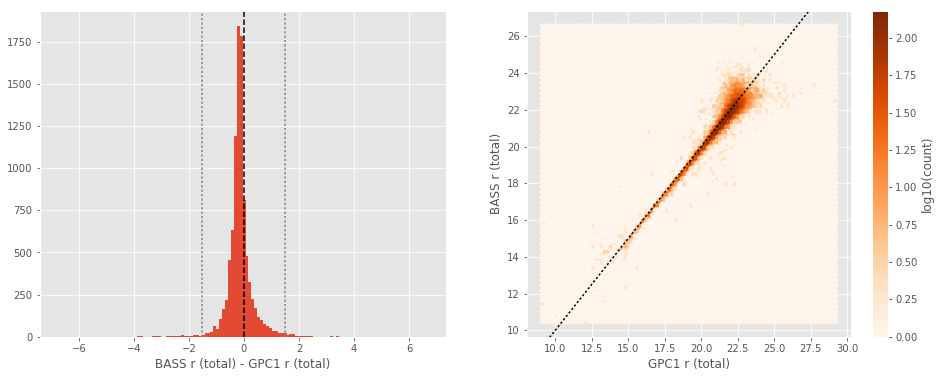

Mosaic r (aperture) - GPC1 r (aperture):
- Median: 0.22
- Median Absolute Deviation: 0.32
- 1% percentile: -1.8414005349731444
- 99% percentile: 2.8508502917480474


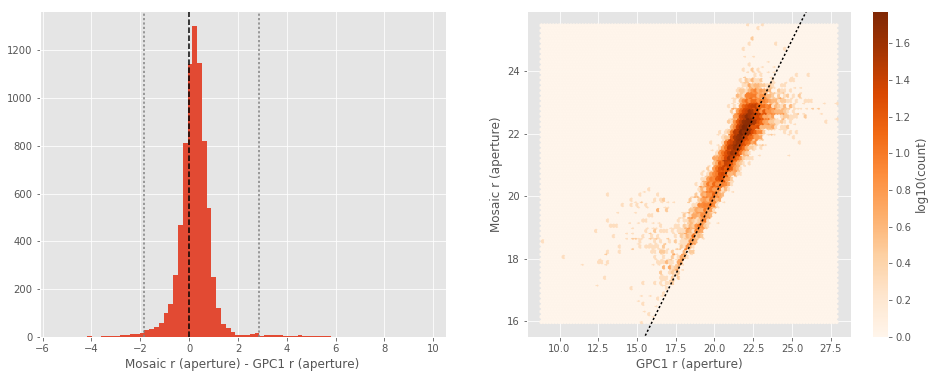

Mosaic r (total) - GPC1 r (total):
- Median: -0.42
- Median Absolute Deviation: 0.18
- 1% percentile: -1.9855659414672848
- 99% percentile: 2.190633996154749


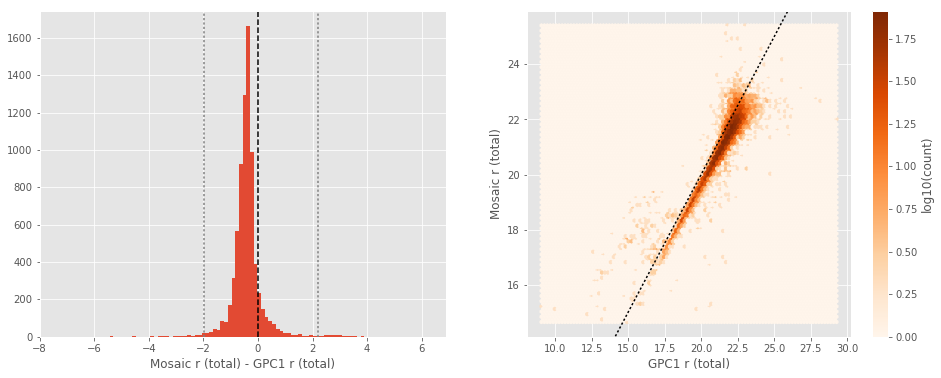

Mosaic r (aperture) - BASS r (aperture):
- Median: 0.24
- Median Absolute Deviation: 0.24
- 1% percentile: -1.8769584167480473
- 99% percentile: 1.2205232307128888


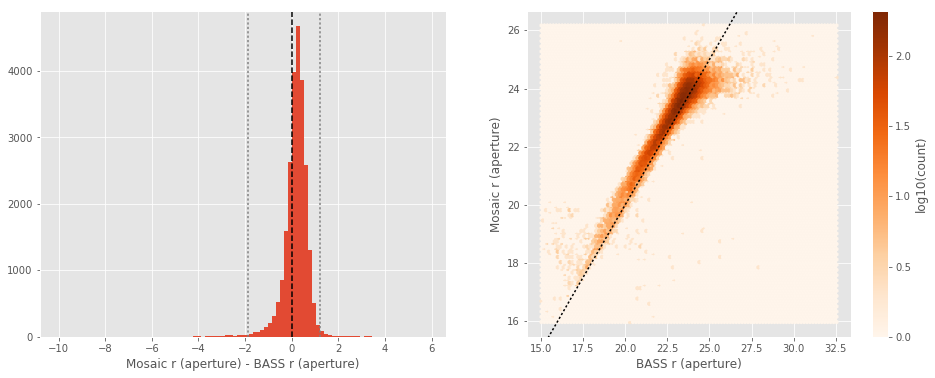

Mosaic r (total) - BASS r (total):
- Median: -0.28
- Median Absolute Deviation: 0.17
- 1% percentile: -2.158426759765624
- 99% percentile: 1.0193465371093762


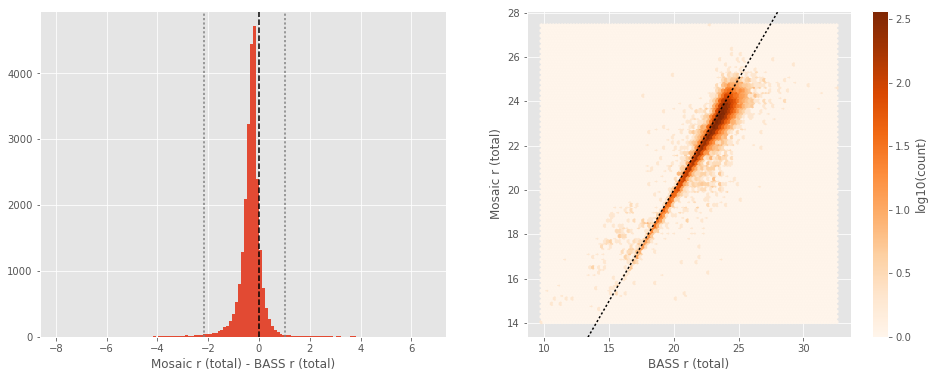

Mosaic i (aperture) - GPC1 i (aperture):
- Median: 0.13
- Median Absolute Deviation: 0.24
- 1% percentile: -0.7907203921508795
- 99% percentile: 1.799505656967174


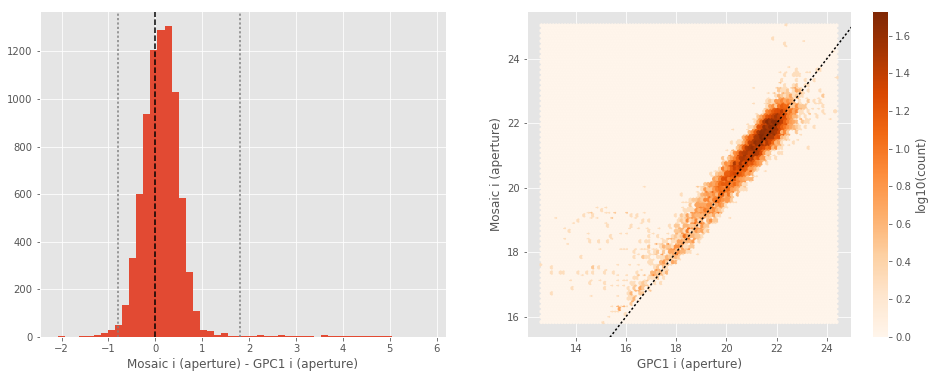

Mosaic i (total) - GPC1 i (total):
- Median: -0.69
- Median Absolute Deviation: 0.13
- 1% percentile: -2.9781358139038083
- 99% percentile: 0.6450843341064489


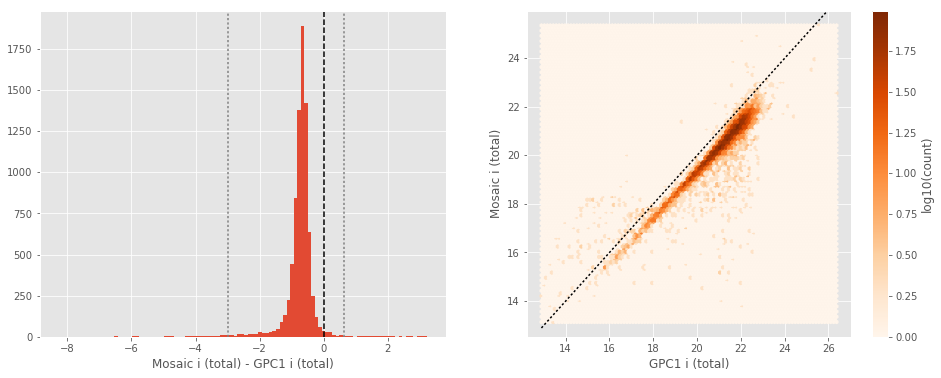

BASS z (aperture) - GPC1 z (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.15
- 1% percentile: -1.4494898796081543
- 99% percentile: 2.9216113090515163


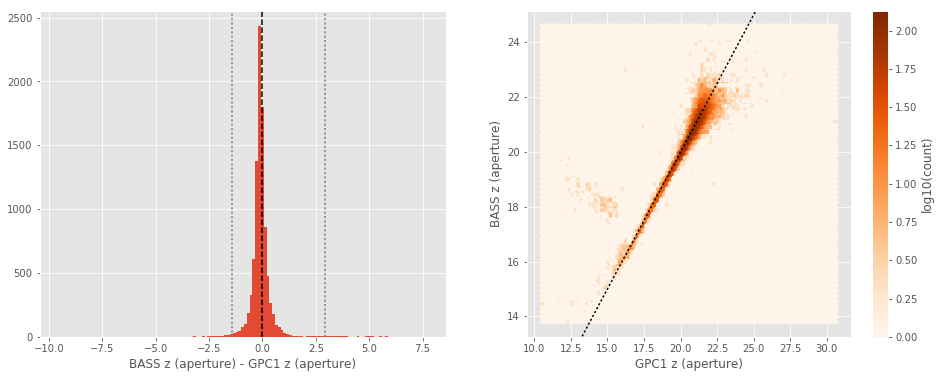

BASS z (total) - GPC1 z (total):
- Median: -0.27
- Median Absolute Deviation: 0.15
- 1% percentile: -1.5613069915771483
- 99% percentile: 1.0631090354919386


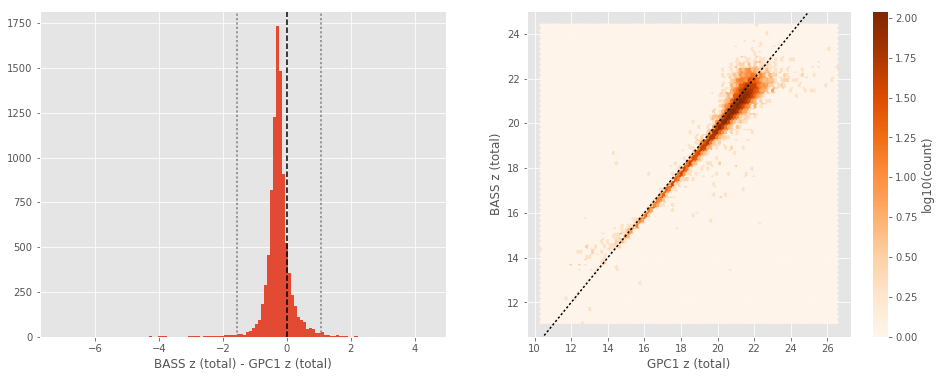

90prime z (aperture) - GPC1 z (aperture):
- Median: 0.68
- Median Absolute Deviation: 0.21
- 1% percentile: -0.6251625442504882
- 99% percentile: 1.6583160781860333


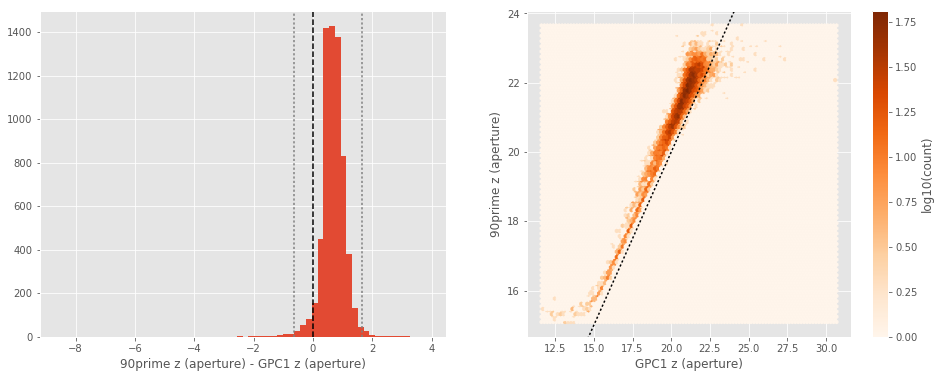

90prime z (total) - GPC1 z (total):
- Median: -0.21
- Median Absolute Deviation: 0.13
- 1% percentile: -1.2159041023254393
- 99% percentile: 0.7566789245605483


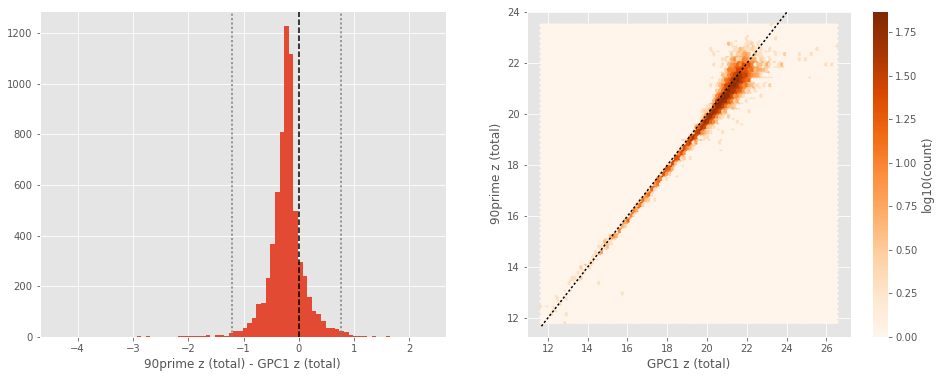

90prime z (aperture) - BASS z (aperture):
- Median: 0.77
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3593448448181151
- 99% percentile: 1.3141249656677247


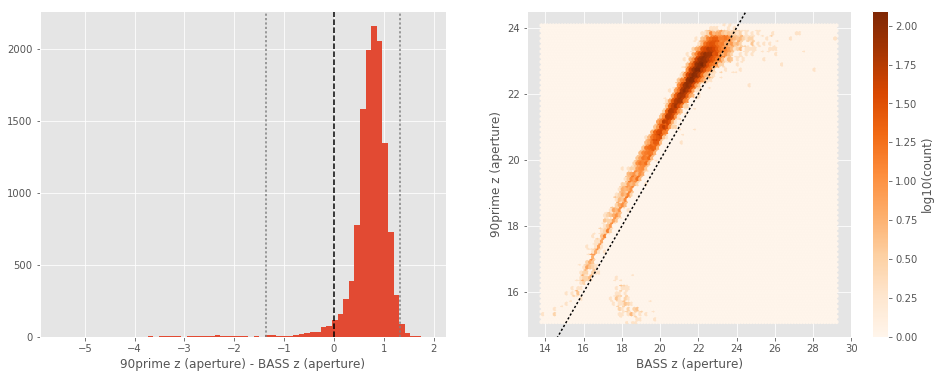

90prime z (total) - BASS z (total):
- Median: 0.07
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0331056213378906
- 99% percentile: 0.82325668334961


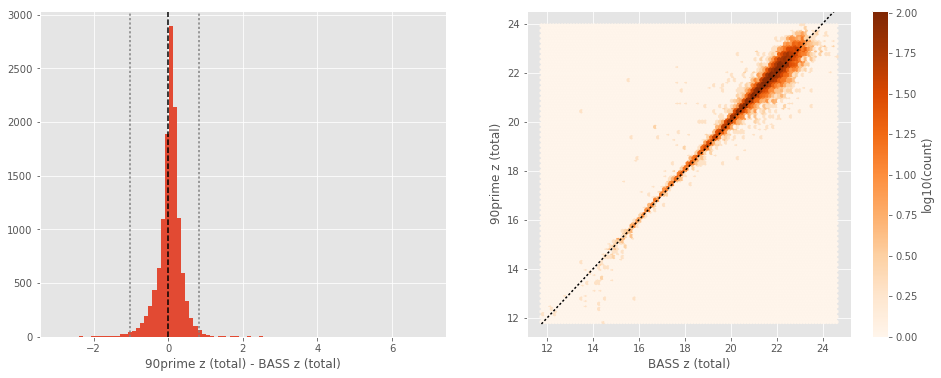

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Bootes.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.51
- Median Absolute Deviation: 0.27
- 1% percentile: -2.5749729919433593
- 99% percentile: 1.5987586212158078


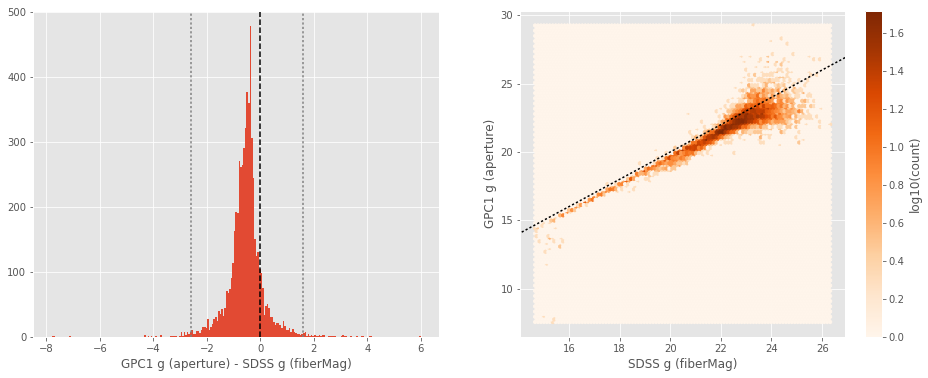

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.06
- Median Absolute Deviation: 0.25
- 1% percentile: -3.846170425415039
- 99% percentile: 1.4637561798095655


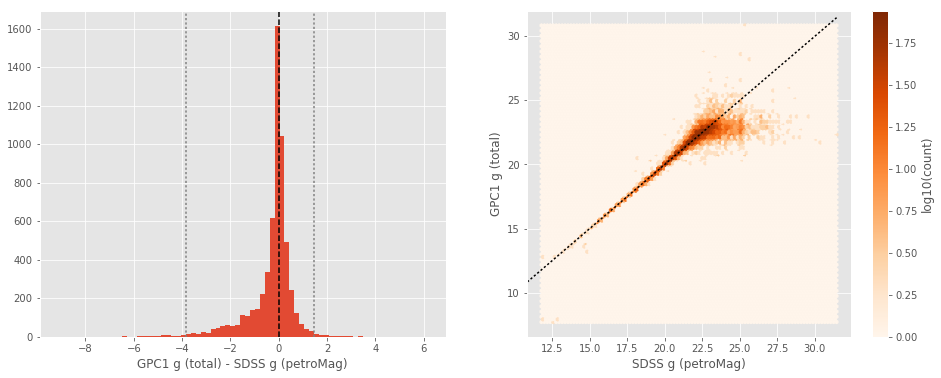

BASS g (aperture) - SDSS g (fiberMag):
- Median: -0.40
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1372121810913085
- 99% percentile: 1.3654207229614252


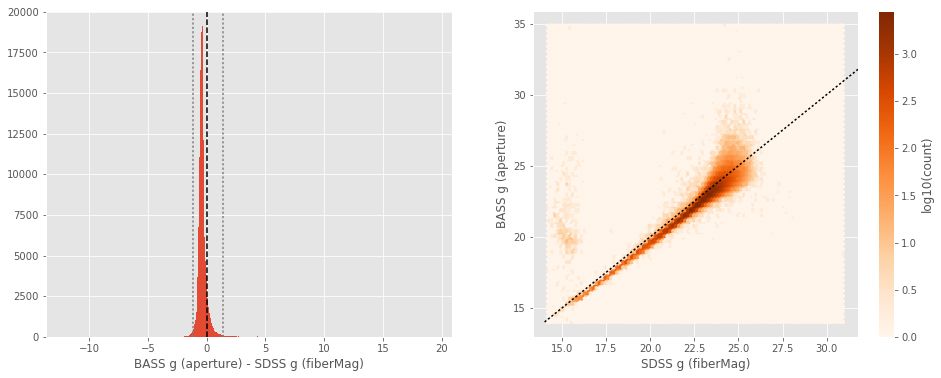

BASS g (total) - SDSS g (petroMag):
- Median: -0.07
- Median Absolute Deviation: 0.23
- 1% percentile: -3.0351842498779296
- 99% percentile: 1.776186714172361


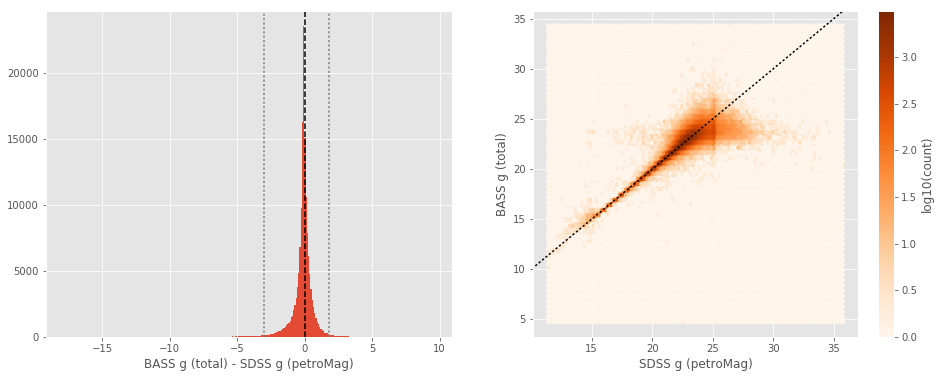

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.44
- Median Absolute Deviation: 0.19
- 1% percentile: -1.6151736259460447
- 99% percentile: 1.249356269836422


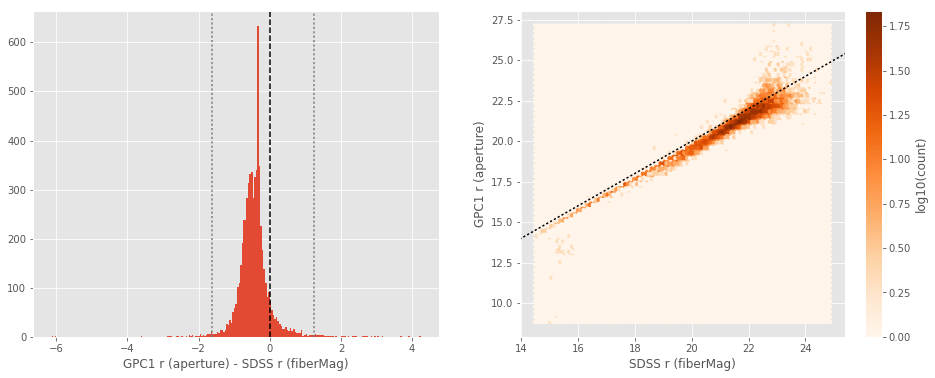

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.03
- Median Absolute Deviation: 0.15
- 1% percentile: -2.1705027770996095
- 99% percentile: 1.1393575859069827


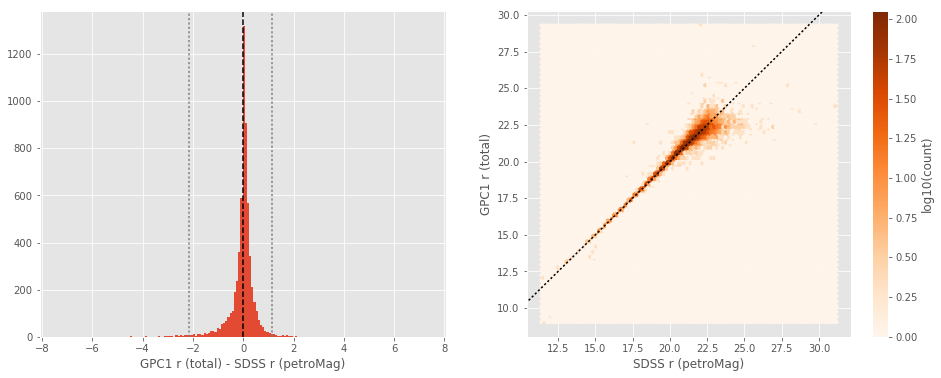

BASS r (aperture) - SDSS r (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.14
- 1% percentile: -1.085783805847168
- 99% percentile: 0.6129846382141135


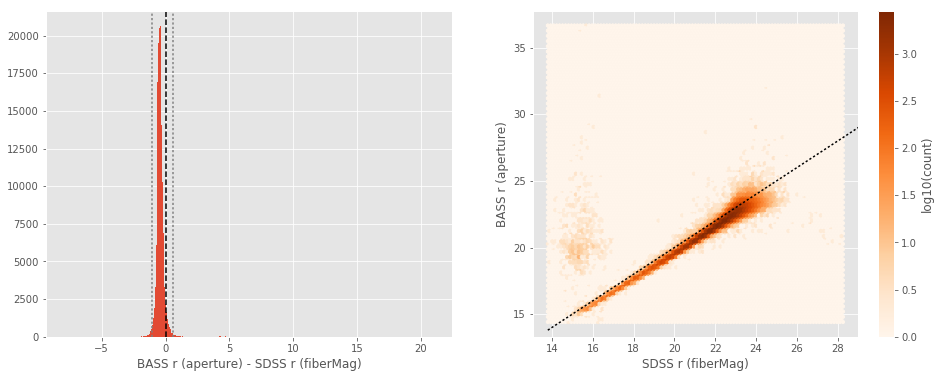

BASS r (total) - SDSS r (petroMag):
- Median: -0.14
- Median Absolute Deviation: 0.16
- 1% percentile: -2.7189156341552736
- 99% percentile: 1.0956977081298933


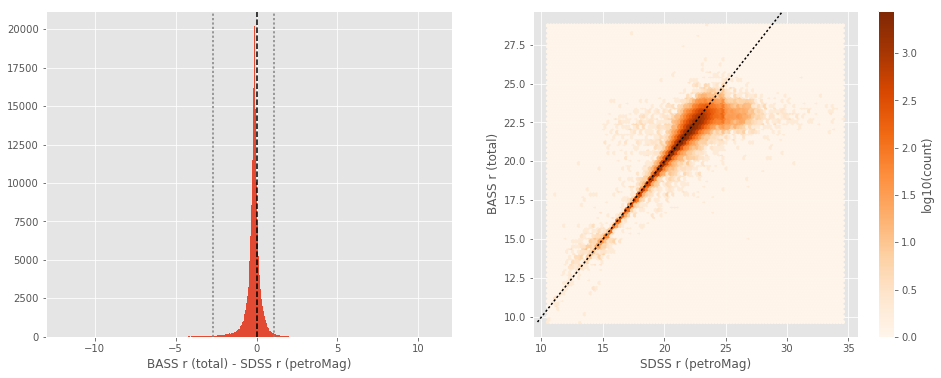

Mosaic r (aperture) - SDSS r (fiberMag):
- Median: -0.22
- Median Absolute Deviation: 0.17
- 1% percentile: -1.100441244750976
- 99% percentile: 2.3286396000671497


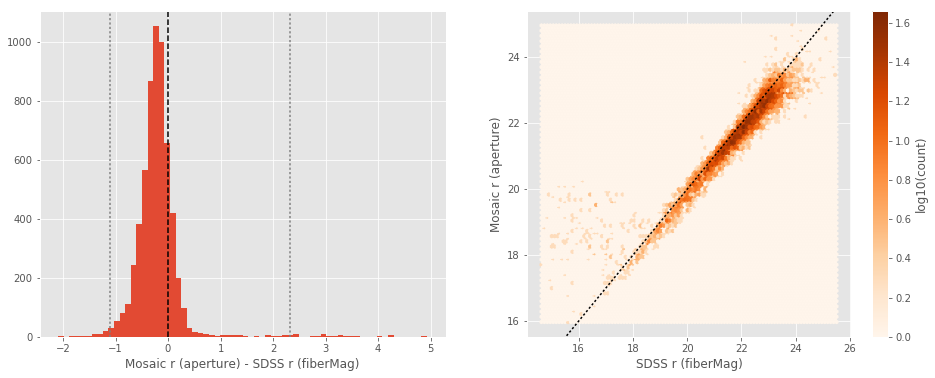

Mosaic r (total) - SDSS r (petroMag):
- Median: -0.40
- Median Absolute Deviation: 0.18
- 1% percentile: -3.358373621154785
- 99% percentile: 1.9720653101501413


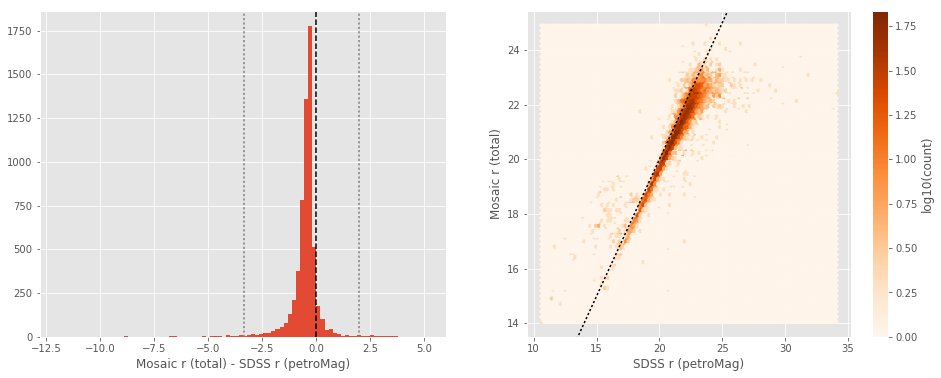

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.40
- Median Absolute Deviation: 0.11
- 1% percentile: -1.000070571899414
- 99% percentile: 0.2132720947265625


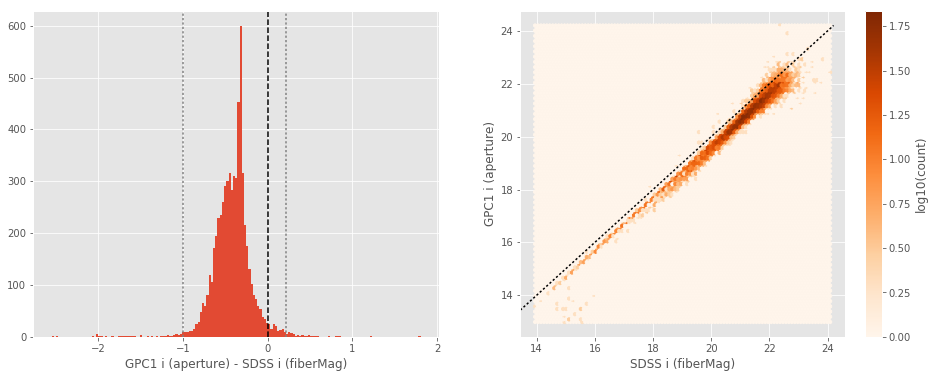

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.12
- 1% percentile: -2.10944658279419
- 99% percentile: 0.8501059150695796


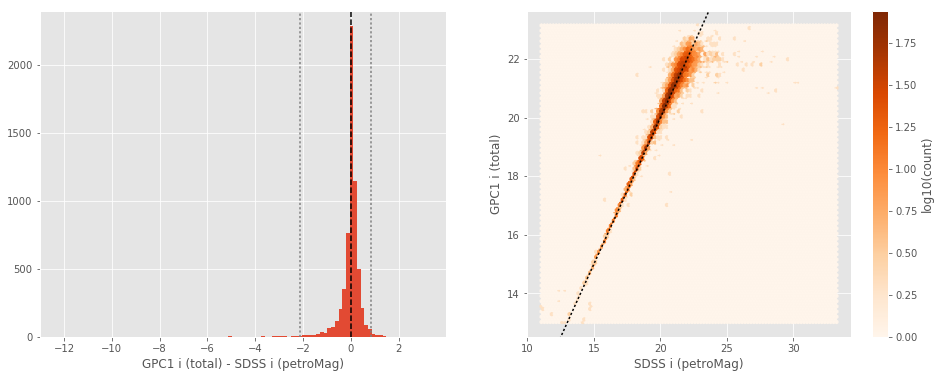

Mosaic i (aperture) - SDSS i (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.21
- 1% percentile: -1.1108595972900388
- 99% percentile: 1.2927924023437458


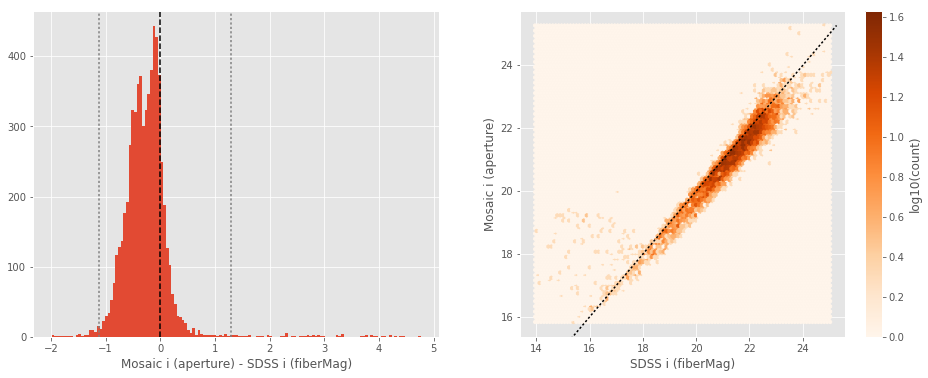

Mosaic i (total) - SDSS i (petroMag):
- Median: -0.63
- Median Absolute Deviation: 0.20
- 1% percentile: -4.420789079467774
- 99% percentile: 1.2254234401245139


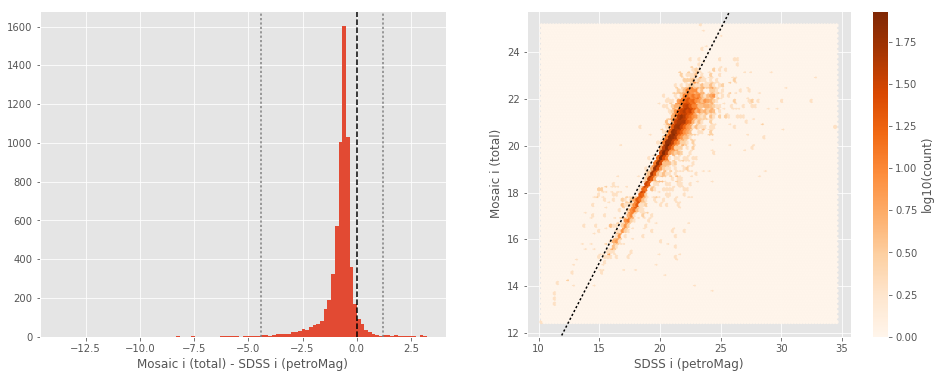

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.19
- 1% percentile: -1.3301345825195312
- 99% percentile: 1.0744086265563844


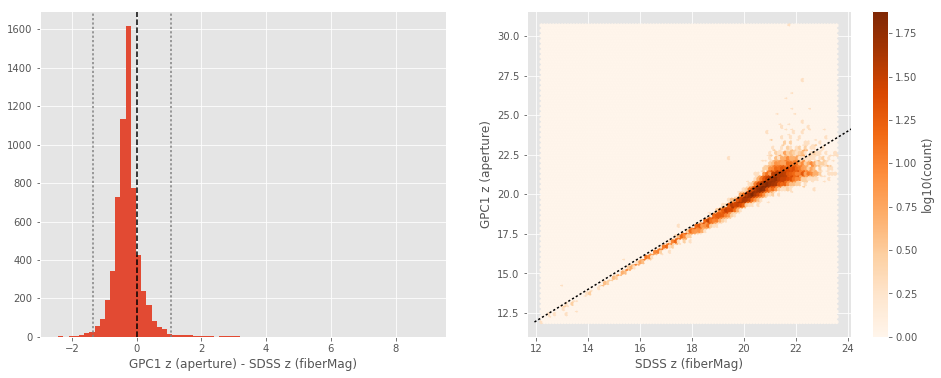

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.14
- Median Absolute Deviation: 0.28
- 1% percentile: -3.012088623046875
- 99% percentile: 1.6818264007568349


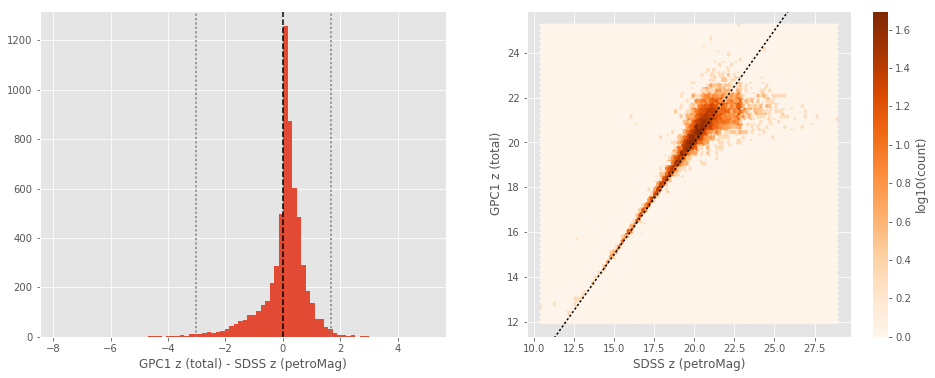

BASS z (aperture) - SDSS z (fiberMag):
- Median: -0.37
- Median Absolute Deviation: 0.22
- 1% percentile: -1.463261241912842
- 99% percentile: 2.1186053466796873


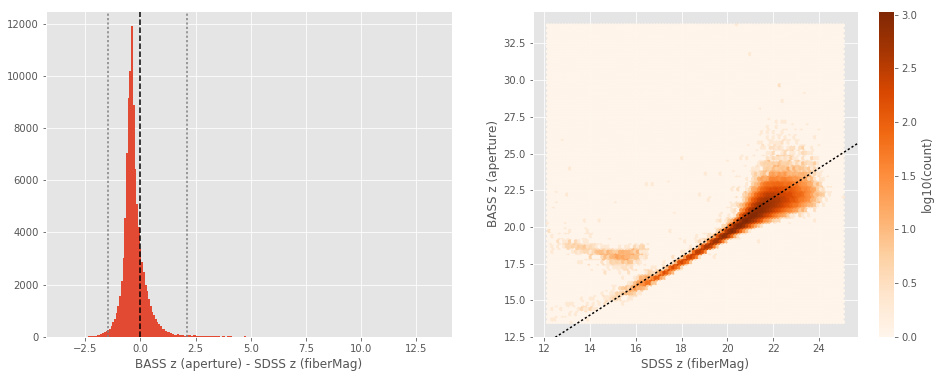

BASS z (total) - SDSS z (petroMag):
- Median: -0.11
- Median Absolute Deviation: 0.39
- 1% percentile: -3.938025093078613
- 99% percentile: 2.1002536773681646


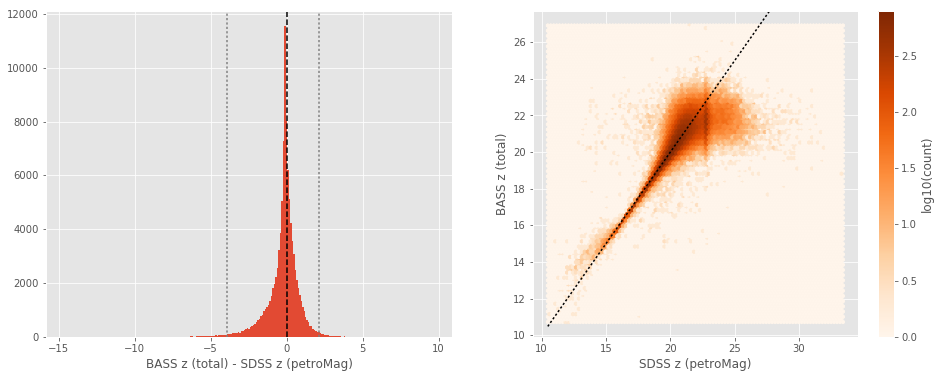

90prime z (aperture) - SDSS z (fiberMag):
- Median: 0.38
- Median Absolute Deviation: 0.18
- 1% percentile: -0.5909224510192871
- 99% percentile: 1.534122304916381


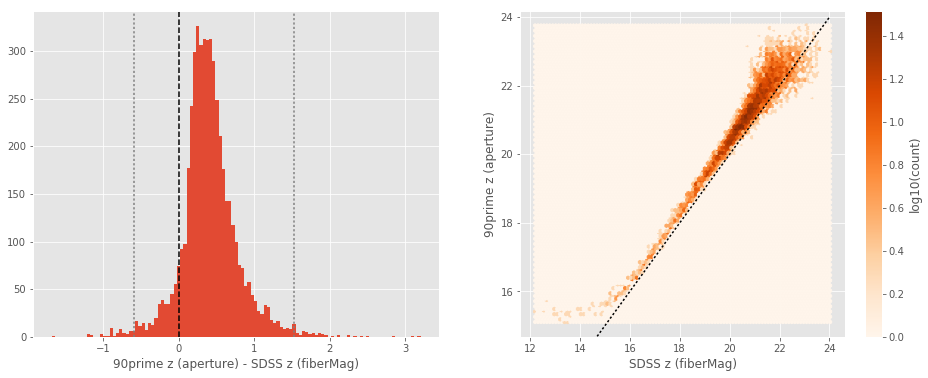

90prime z (total) - SDSS z (petroMag):
- Median: -0.07
- Median Absolute Deviation: 0.31
- 1% percentile: -3.462567768096924
- 99% percentile: 1.8039380645751952


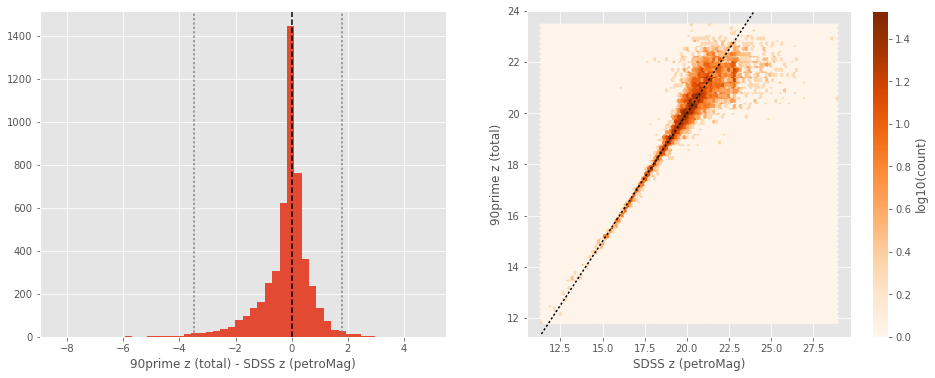

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [14]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [15]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Bootes.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: -0.00
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9620753796293084
- 99% percentile: 1.0657768512056596


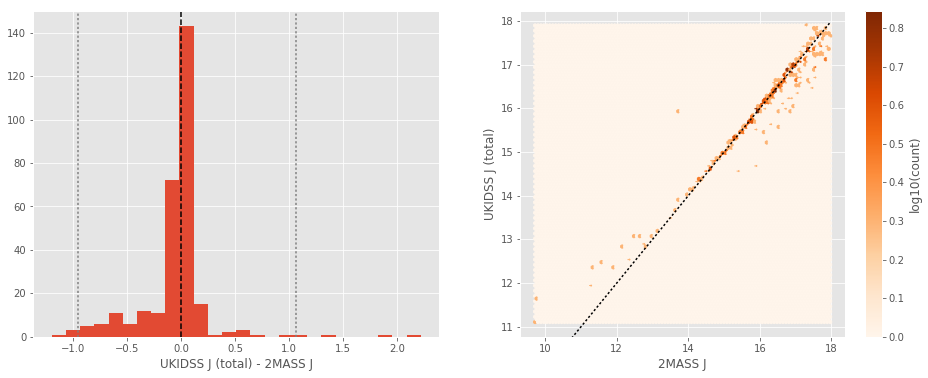

In [16]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_newfirm_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [17]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 7193 / 709633 (1.01%)


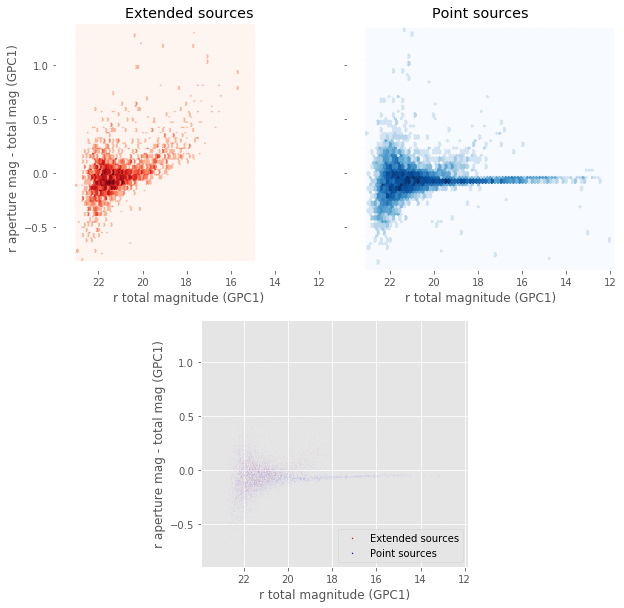

In [18]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (GPC1)", "r aperture mag - total mag (GPC1)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 5110 / 709633 (0.72%)


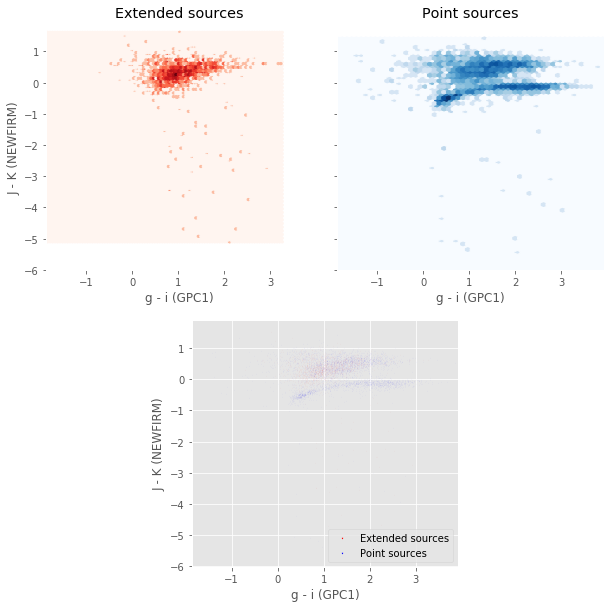

In [19]:
nb_ccplots(
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    master_catalogue['m_newfirm_j'] - master_catalogue['m_newfirm_k'],
    "g - i (GPC1)", "J - K (NEWFIRM)",
    master_catalogue["stellarity"]
)

Number of source used: 3893 / 709633 (0.55%)


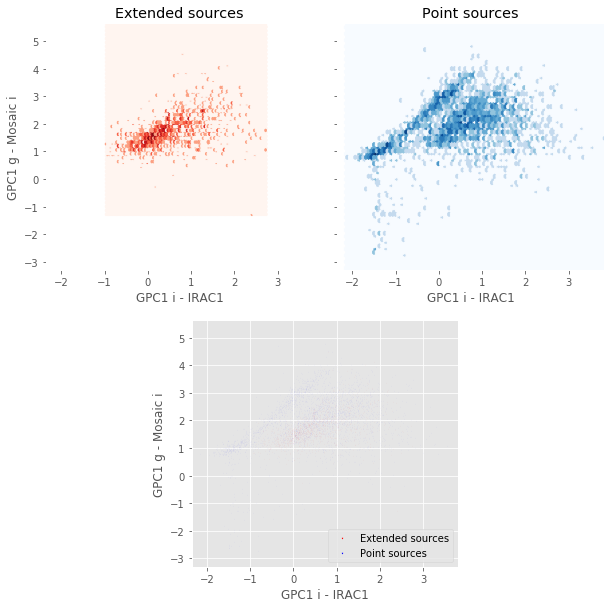

In [20]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_datafusion_irac_i1'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_mosaic_i'],
    "GPC1 i - IRAC1", "GPC1 g - Mosaic i",
    master_catalogue["stellarity"]
)

Number of source used: 10256 / 709633 (1.45%)


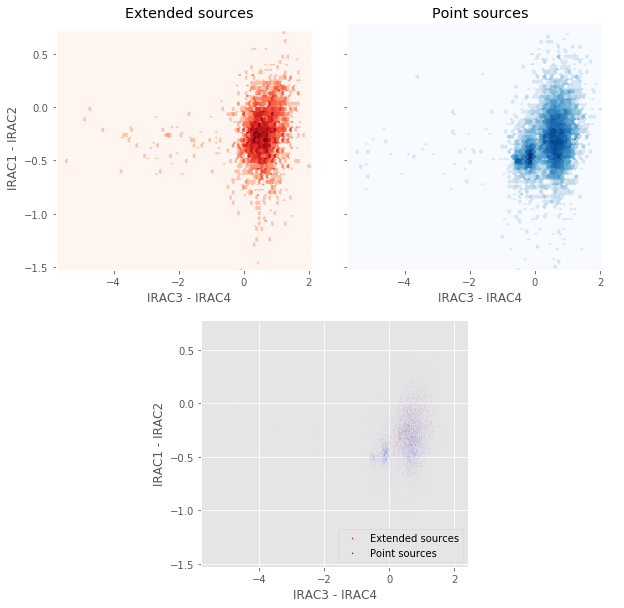

In [21]:
nb_ccplots(
    master_catalogue['m_newfirm_j'] - master_catalogue['m_newfirm_k'],
    master_catalogue['m_datafusion_irac_i1'] - master_catalogue['m_datafusion_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)